**Comparison of Reading File between Pandas and PySpark**

Read file using Pandas

In [1]:
import random

In [2]:
%time
import pandas as pd
import numpy as np

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


In [3]:
%time
from google.colab import drive
drive.mount('/content/drive')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 23.4 µs
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%time
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rate.csv')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


Read file using PySpark

In [6]:
%time
! pip install pyspark

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%time
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
spark = SparkSession.builder.appName("pyspark_basics").getOrCreate()
df2 = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Rate.csv", header=True)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


**Comparison of Displaying Dataset between Pandas and PySpark**

Dataset for Pandas

In [8]:
%time
df.head()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


Dataset for PySpark

In [9]:
%time
df2.show()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
+------------+---------+--------+----------+----------+-------------------+---------+----------+-----------------+------------------+--------------+-------------+-------------+-------------+--------------+---------------------+------+--------------------------------+---------------------------------+-----------------------------------------+---------------------+----------------------+------------------------------+---------+
|BusinessYear|StateCode|IssuerId|SourceName|VersionNum|         ImportDate|IssuerId2|FederalTIN|RateEffectiveDate|RateExpirationDate|        PlanId| RatingAreaId|      Tobacco|          Age|IndividualRate|IndividualTobaccoRate|Couple|PrimarySubscriberAndOneDependent|PrimarySubscriberAndTwoDependents|PrimarySubscriberAndThreeOrMoreDependents|CoupleAndOneDependent|CoupleAndTwoDependents|CoupleAndThreeOrMoreDependents|RowNumber|
+------------+---------+--------+----------+----------+-----------------

**Comparison of checking data info between Pandas and PySpark**

Check data info using Pandas

In [10]:
%time
df.info

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


<bound method DataFrame.info of           BusinessYear StateCode  IssuerId SourceName  VersionNum  \
0                 2014        AK     21989       HIOS           6   
1                 2014        AK     21989       HIOS           6   
2                 2014        AK     21989       HIOS           6   
3                 2014        AK     21989       HIOS           6   
4                 2014        AK     21989       HIOS           6   
...                ...       ...       ...        ...         ...   
12694440          2016        WV     96480      SERFF           2   
12694441          2016        WV     96480      SERFF           2   
12694442          2016        WV     96480      SERFF           2   
12694443          2016        WV     96480      SERFF           2   
12694444          2016        WV     96480      SERFF           2   

                   ImportDate  IssuerId2  FederalTIN RateEffectiveDate  \
0         2014-03-19 07:06:49      21989  93-0438772        2014-

Check data info using PySpark

In [11]:
%time
df2.printSchema()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
root
 |-- BusinessYear: string (nullable = true)
 |-- StateCode: string (nullable = true)
 |-- IssuerId: string (nullable = true)
 |-- SourceName: string (nullable = true)
 |-- VersionNum: string (nullable = true)
 |-- ImportDate: string (nullable = true)
 |-- IssuerId2: string (nullable = true)
 |-- FederalTIN: string (nullable = true)
 |-- RateEffectiveDate: string (nullable = true)
 |-- RateExpirationDate: string (nullable = true)
 |-- PlanId: string (nullable = true)
 |-- RatingAreaId: string (nullable = true)
 |-- Tobacco: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- IndividualRate: string (nullable = true)
 |-- IndividualTobaccoRate: string (nullable = true)
 |-- Couple: string (nullable = true)
 |-- PrimarySubscriberAndOneDependent: string (nullable = true)
 |-- PrimarySubscriberAndTwoDependents: string (nullable = true)
 |-- PrimarySubscriberAndThreeOrMoreDependents: string (nullable = true)
 |-

Convert data types from string to other datatype such as float data type

In [18]:
from pyspark.sql.types import StructField, IntegerType, StructType, FloatType
df2 = df2.withColumn('IndividualTobaccoRate', df2['IndividualTobaccoRate'].cast(FloatType()))
df2 = df2.withColumn('Couple', df2['Couple'].cast(FloatType()))
df2 = df2.withColumn('PrimarySubscriberAndOneDependent', df2['PrimarySubscriberAndOneDependent'].cast(FloatType()))
df2 = df2.withColumn('PrimarySubscriberAndTwoDependents', df2['PrimarySubscriberAndTwoDependents'].cast(FloatType()))
df2 = df2.withColumn('PrimarySubscriberAndThreeOrMoreDependents', df2['PrimarySubscriberAndThreeOrMoreDependents'].cast(FloatType()))
df2 = df2.withColumn('CoupleAndOneDependent', df2['CoupleAndOneDependent'].cast(FloatType()))
df2 = df2.withColumn('CoupleAndTwoDependents', df2['CoupleAndTwoDependents'].cast(FloatType()))
df2 = df2.withColumn('CoupleAndThreeOrMoreDependents', df2['CoupleAndThreeOrMoreDependents'].cast(FloatType()))

In [19]:
df2.printSchema()

root
 |-- BusinessYear: long (nullable = false)
 |-- StateCode: long (nullable = false)
 |-- IssuerId: long (nullable = false)
 |-- SourceName: long (nullable = false)
 |-- VersionNum: long (nullable = false)
 |-- ImportDate: long (nullable = false)
 |-- IssuerId2: long (nullable = false)
 |-- FederalTIN: long (nullable = false)
 |-- RateEffectiveDate: long (nullable = false)
 |-- RateExpirationDate: long (nullable = false)
 |-- PlanId: long (nullable = false)
 |-- RatingAreaId: long (nullable = false)
 |-- Tobacco: long (nullable = false)
 |-- Age: long (nullable = false)
 |-- IndividualRate: long (nullable = false)
 |-- IndividualTobaccoRate: float (nullable = false)
 |-- Couple: float (nullable = false)
 |-- PrimarySubscriberAndOneDependent: float (nullable = false)
 |-- PrimarySubscriberAndTwoDependents: float (nullable = false)
 |-- PrimarySubscriberAndThreeOrMoreDependents: float (nullable = false)
 |-- CoupleAndOneDependent: float (nullable = false)
 |-- CoupleAndTwoDependents: 

**Comparison of checking for null value between Pandas and PySpark**

Checking for null value (Pandas)

In [13]:
%time
df.isnull().sum()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


BusinessYear                                        0
StateCode                                           0
IssuerId                                            0
SourceName                                          0
VersionNum                                          0
ImportDate                                          0
IssuerId2                                           0
FederalTIN                                          0
RateEffectiveDate                                   0
RateExpirationDate                                  0
PlanId                                              0
RatingAreaId                                        0
Tobacco                                             0
Age                                                 0
IndividualRate                                      0
IndividualTobaccoRate                         7762096
Couple                                       12653504
PrimarySubscriberAndOneDependent             12653504
PrimarySubscriberAndTwoDepen

Checking for null value (Pandas)

In [ ]:
%time
from pyspark.sql.functions import col,isnan,when,count
df2 = df2.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs


**Pandas**

Reading File: 5.72 µs

Display dataset: 8.34 µs

Checking info: 7.39 µs

Checking null value: 8.58 µs


**PySpark**

Reading File: 7.63 µs

Display dataset: 7.87 µs

Checking info: 7.39 µs

Checking null value: 8.34 µs

##**Comparing Pandas and PySpark**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Compare = ['Reading File', 'Display dataset', 'Checking Info', 'Checking Null Value']
result = pd.DataFrame({'Pandas (unit: µs)': [5.72, 8.34, 7.39, 8.58], 'PySpark (unit: µs)': [7.63, 7.87, 7.39, 8.34]}, index = Compare)
result

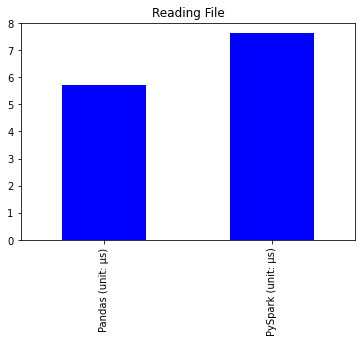

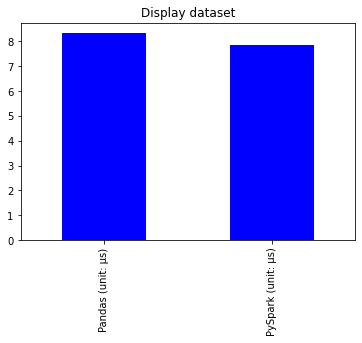

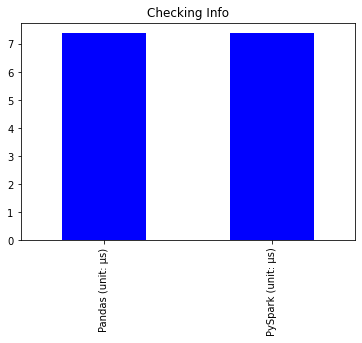

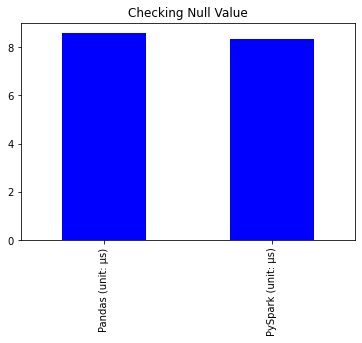

In [22]:
for Compare in result.index:
  result.loc[Compare].plot(kind='bar', title=Compare, color = "blue")
  plt.show()

##**Conclusion**

From the above analysis and comparison, we can know that the PySpark clearly had a better performance compare with Pandas although the performance is only better slightly. Only for the reading file, Pandas have better performance than PySpark about 1.91 µs. While for checking info, both Pandas and PySpark miraclely have the same processing time which is 7.39 µs. Both display dataset function and checking the null value, PySpark have better performance which is 0.47 µs for display dataset and 0.2 µs for checking the null value. Although PySpark have a greater performance, PySpark do have a weird function which it will convert all datatypes to string datatypes. Thus, we need to convert certain datatype to other datatype such as float.

In a nutshell, PySpark have a better performance but somehow 'leceh'.